##Setting up environment

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
cd '/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session12_ImageNet/'

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session12_ImageNet


In [3]:
ls

 data/        metrics/       'PreProcessing stats.gsheet'   scripts/
 gradcam/     models/         __pycache__/                  test.py
 lr_finder/   prepare_data/   run_results/                  train.py


##Import libraries

In [4]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir


  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-n46xmstg
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-n46xmstg
     |████████████████████████████████| 634kB 4.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=301cb81a7ea13f6b2c85e106f1401de0241a4a48fbb49ad3fe23a0172e766aed
  Stored in directory: /tmp/pip-ephem-wheel-cache-jbtxrit5/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=afe884c5dda68ace0047c26158cd5117e3ba293e69792609befe86c0aa11a50a
  Stored in directory: /tmp/pip-ephem-wheel-cache-jbtxrit5/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

## Import modules

In [5]:
#To reload custom modules
import autoreload
# %load_ext autoreload
%reload_ext autoreload
%autoreload

#import all necessary .py files
from train import train
from test import test


# Torchvision transforms
#from transform import transform

# Albumentations transform
from prepare_data import *
# Residing place of DNN models
from models import *
# For graphs and incorrect image sample
from metrics import metrics, image_utilities

# Gradient Class Activation mapping
from gradcam import gradcam, gradcampp, utils
# To find the optimum learning rate
from lr_finder import LRFinder


Albumentations version: 0.4.5
Resnet18 model


In [0]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

## ImageNet Data Preparation

In [6]:
# Go back to home folder of the virtual machine.
cd /content

/content


In [7]:
!ls

sample_data


In [8]:
# Download Tiny imagenet dataset and extract.
imagenet_download_and_extract()

data folder for Imagenet is being created.

Imagenet dataset does not exist. Downloading...


File downloaded. Unzipping file.


File unzip completed. Time taken- 17.69 sec


In [9]:
# Merge validation dataset into train set.
train_validation_dataset_merge()

Train and Validation dataset merge begins.
Train and Validation dataset merge is completed. Time taken-313.65 msec


In [10]:
# Split shuffled dataset into train and test dataset in ration 70:30.
train_test_dataset_split()

## Model setup and summary

In [11]:
#Check the number of parameters
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#My model
#net = Net().to(device)

#Resnet18 model
net = ResNet18(num_classes=200).to(device)

# Mixed Resnet model
# net = MixedResNet9(num_classes=200).to(device)
summary(net, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

##Display transformed training data.##
Call transform function to set the dataloaders.
Display examples of augmented training dataset.

Batchsize used = 256

Image transformation applied-

1) Padding on the image by 8 on all sides. Random crop of 64 from the resultant image.

2) Horizontal flip (50% probability).

3) Rotate upto (-15, 15 degrees) (50% probability).

4) Gaussian noise and coarse dropout of size (8, 16).

In [0]:
means = np.array((0.485, 0.456, 0.406))
stddev = np.array((0.229, 0.224, 0.225))

Train set
Test set


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


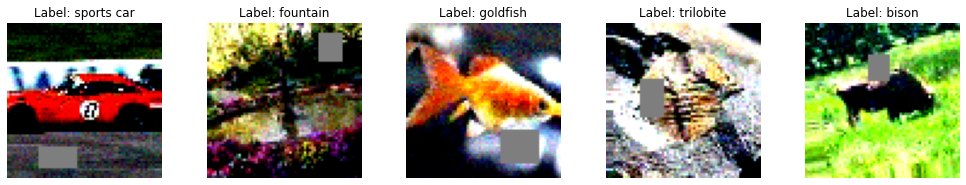

In [22]:
trainloader, testloader, classes = transform_albumentation.transform((0.485, 0.456, 0.406), (0.229, 0.224, 0.225), 256)
#Display the transformed training data.
image_display_size = 5
dataiter = iter(trainloader)
images, labels = dataiter.next()


# imshow(disp_images[0])
# print(disp_images[0].shape)
fig, axs = plt.subplots(1, 5, figsize=(14, 14))
fig.tight_layout()

for i in range(image_display_size):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[labels[i].item()][1]}')
    axs[i].imshow(np.transpose(((images[i]/2 + 0.5).numpy()), (1, 2, 0)))

##Find the optimum Learning rate using LRFinder.
This is to determine the minimum and maximum LR boundaries. 
1. start_lr=0.001 and end_lr=0.5 (exp): Steep decrease in loss observed between 0.01 and 0.2
2. start_lr = 0.01 and end_lr=0.1 (exp): Best loss observed at 0.03



Learning rate search finished. See the graph with {finder_name}.plot()
Best Loss observed at LR= 0.1622422255471346


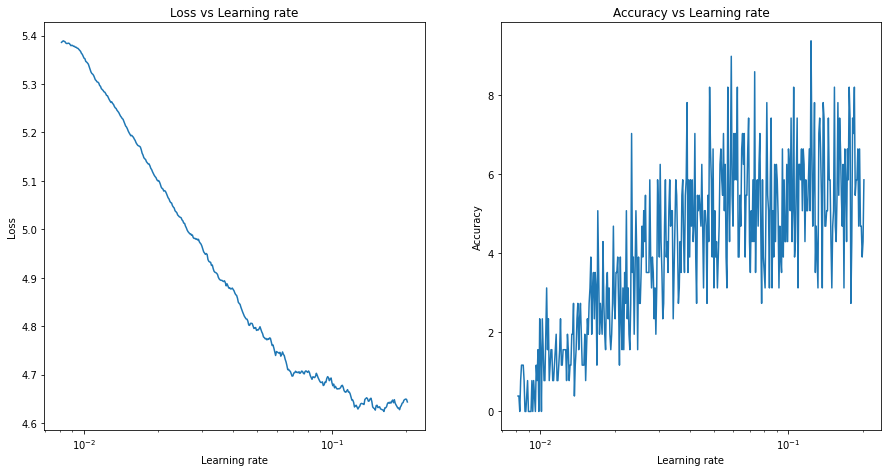

In [0]:
criterion = nn.CrossEntropyLoss()
# Optimum LR for custom_model = 0.015
optimizer = optim.SGD(net.parameters(), lr=0.008, weight_decay=0.001)
lr_finder = LRFinder(net, optimizer, criterion, device)
#Run the range test
lr_finder.range_test(trainloader, end_lr=0.2, num_iter=400, step_mode="exp")
print("Best Loss observed at LR=",lr_finder.history['lr'][lr_finder.history['Loss'].index(lr_finder.best_loss)])
lr_finder.plot(skip_start=0, skip_end=0, log_lr=True)
lr_finder.reset()

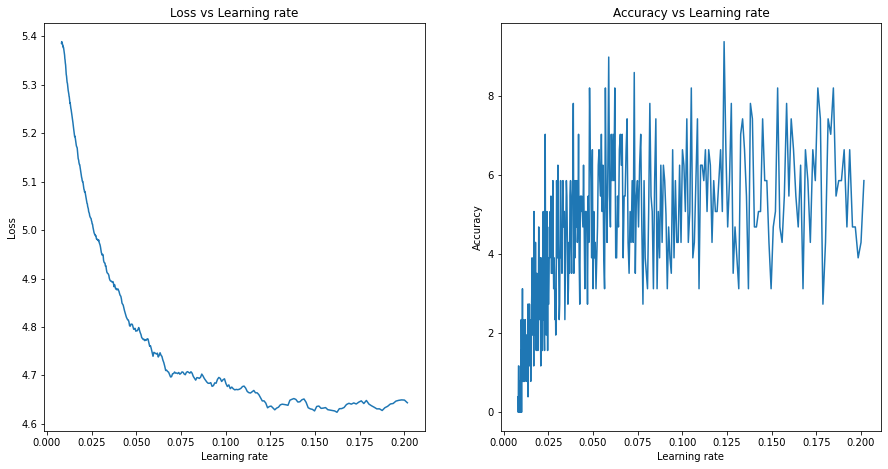

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f40264b8278>,
      dtype=object)

In [0]:
lr_finder.plot(skip_start=0, skip_end=0, log_lr=False)

## Model training and validation

In [12]:
EPOCHS =48
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
from torch.optim.lr_scheduler import OneCycleLR 
#import Tiny Imagenet data. Perform Normalize, Batching through transforms.
trainloader, testloader, classes = transform((0.485, 0.456, 0.406), (0.229, 0.224, 0.225), 256)
criterion = nn.CrossEntropyLoss()
# Optimum LR for custom_model = 0.015, 0.04 for resnet
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)

#One Cycle Policy requires scheduler update after every batch. Hence, passing the scheduler to the train function to update after every batch.
scheduler = OneCycleLR(optimizer, max_lr=0.01, total_steps=None, epochs=EPOCHS, steps_per_epoch=len(trainloader), pct_start=8/EPOCHS, anneal_strategy='linear', cycle_momentum=True, 
                       base_momentum=0.85, max_momentum=0.95, div_factor=100, final_div_factor=1, last_epoch=-1)

for epoch in range(EPOCHS):
  print("\nepoch:", epoch)
  train_accuracy_delta, train_loss_delta = train(net, device, trainloader, optimizer, criterion, epoch, scheduler)
  test_accuracy_delta, test_loss_delta = test(net, device, testloader, criterion)
  
  train_accuracy.append(train_accuracy_delta)
  train_loss.append(train_loss_delta)
  test_accuracy.append(test_accuracy_delta)
  test_loss.append(test_loss_delta)
  
print("Train Accuracy-",train_accuracy)
print("Test Accuracy-",test_accuracy)

print("Train loss-",train_loss)
print("Test loss-",test_loss)



epoch: 0



Epoch train loss: 5.1028, Epoch Train Accuracy: 2.95%
Epoch Test loss: 4.7434, Epoch Test Accuracy: (1849/33000) - 5.60%

epoch: 1



Epoch train loss: 4.5042, Epoch Train Accuracy: 8.01%
Epoch Test loss: 4.3418, Epoch Test Accuracy: (3016/33000) - 9.14%

epoch: 2



Epoch train loss: 4.0824, Epoch Train Accuracy: 12.49%
Epoch Test loss: 4.1190, Epoch Test Accuracy: (3938/33000) - 11.93%

epoch: 3



Epoch train loss: 3.8321, Epoch Train Accuracy: 16.21%
Epoch Test loss: 4.2826, Epoch Test Accuracy: (3552/33000) - 10.76%

epoch: 4



Epoch train loss: 3.6528, Epoch Train Accuracy: 18.82%
Epoch Test loss: 3.6820, Epoch Test Accuracy: (5955/33000) - 18.05%

epoch: 5



Epoch train loss: 3.5312, Epoch Train Accuracy: 21.14%
Epoch Test loss: 3.8601, Epoch Test Accuracy: (5103/33000) - 15.46%

epoch: 6



Epoch train loss: 3.4436, Epoch Train Accuracy: 22.67%
Epoch Test loss: 3.5870, Epoch Test Accuracy: (6419/33000) - 19.45%

epoch: 7



Epoch train loss: 3.3864, Epoch Train Accuracy: 23.93%
Epoch Test loss: 3.9749, Epoch Test Accuracy: (4854/33000) - 14.71%

epoch: 8



Epoch train loss: 3.3238, Epoch Train Accuracy: 25.32%
Epoch Test loss: 3.5590, Epoch Test Accuracy: (6654/33000) - 20.16%

epoch: 9



Epoch train loss: 3.2737, Epoch Train Accuracy: 26.42%
Epoch Test loss: 3.8674, Epoch Test Accuracy: (5206/33000) - 15.78%

epoch: 10



Epoch train loss: 3.2291, Epoch Train Accuracy: 27.66%
Epoch Test loss: 3.5238, Epoch Test Accuracy: (6884/33000) - 20.86%

epoch: 11



Epoch train loss: 3.1769, Epoch Train Accuracy: 28.65%
Epoch Test loss: 3.3300, Epoch Test Accuracy: (7989/33000) - 24.21%

epoch: 12



Epoch train loss: 3.1303, Epoch Train Accuracy: 29.85%
Epoch Test loss: 3.4176, Epoch Test Accuracy: (7393/33000) - 22.40%

epoch: 13



Epoch train loss: 3.0834, Epoch Train Accuracy: 30.84%
Epoch Test loss: 3.3364, Epoch Test Accuracy: (8256/33000) - 25.02%

epoch: 14



Epoch train loss: 3.0418, Epoch Train Accuracy: 31.86%
Epoch Test loss: 3.1099, Epoch Test Accuracy: (9902/33000) - 30.01%

epoch: 15



Epoch train loss: 3.0023, Epoch Train Accuracy: 32.71%
Epoch Test loss: 3.0882, Epoch Test Accuracy: (9472/33000) - 28.70%

epoch: 16



Epoch train loss: 2.9663, Epoch Train Accuracy: 33.51%
Epoch Test loss: 2.9827, Epoch Test Accuracy: (10052/33000) - 30.46%

epoch: 17



Epoch train loss: 2.9308, Epoch Train Accuracy: 34.30%
Epoch Test loss: 3.1837, Epoch Test Accuracy: (9074/33000) - 27.50%

epoch: 18



Epoch train loss: 2.9004, Epoch Train Accuracy: 34.99%
Epoch Test loss: 3.0711, Epoch Test Accuracy: (9786/33000) - 29.65%

epoch: 19



Epoch train loss: 2.8673, Epoch Train Accuracy: 35.79%
Epoch Test loss: 2.9966, Epoch Test Accuracy: (10301/33000) - 31.22%

epoch: 20



Epoch train loss: 2.8351, Epoch Train Accuracy: 36.44%
Epoch Test loss: 3.0262, Epoch Test Accuracy: (9828/33000) - 29.78%

epoch: 21



Epoch train loss: 2.7977, Epoch Train Accuracy: 37.15%
Epoch Test loss: 3.1026, Epoch Test Accuracy: (9671/33000) - 29.31%

epoch: 22



Epoch train loss: 2.7788, Epoch Train Accuracy: 37.48%
Epoch Test loss: 2.9287, Epoch Test Accuracy: (10633/33000) - 32.22%

epoch: 23



Epoch train loss: 2.7456, Epoch Train Accuracy: 38.08%
Epoch Test loss: 3.1072, Epoch Test Accuracy: (9673/33000) - 29.31%

epoch: 24



Epoch train loss: 2.7220, Epoch Train Accuracy: 38.75%
Epoch Test loss: 2.9832, Epoch Test Accuracy: (10531/33000) - 31.91%

epoch: 25



Epoch train loss: 2.6933, Epoch Train Accuracy: 39.38%
Epoch Test loss: 2.8718, Epoch Test Accuracy: (11142/33000) - 33.76%

epoch: 26



Epoch train loss: 2.6651, Epoch Train Accuracy: 40.03%
Epoch Test loss: 2.7776, Epoch Test Accuracy: (11650/33000) - 35.30%

epoch: 27



Epoch train loss: 2.6470, Epoch Train Accuracy: 40.34%
Epoch Test loss: 2.8388, Epoch Test Accuracy: (11342/33000) - 34.37%

epoch: 28



Epoch train loss: 2.6179, Epoch Train Accuracy: 41.23%
Epoch Test loss: 3.0177, Epoch Test Accuracy: (10575/33000) - 32.05%

epoch: 29



Epoch train loss: 2.5944, Epoch Train Accuracy: 41.47%
Epoch Test loss: 2.8340, Epoch Test Accuracy: (11627/33000) - 35.23%

epoch: 30



Epoch train loss: 2.5607, Epoch Train Accuracy: 42.36%
Epoch Test loss: 2.8098, Epoch Test Accuracy: (11837/33000) - 35.87%

epoch: 31



Epoch train loss: 2.5412, Epoch Train Accuracy: 42.64%
Epoch Test loss: 2.7142, Epoch Test Accuracy: (12161/33000) - 36.85%

epoch: 32



Epoch train loss: 2.5177, Epoch Train Accuracy: 43.29%
Epoch Test loss: 2.7016, Epoch Test Accuracy: (12329/33000) - 37.36%

epoch: 33



Epoch train loss: 2.4895, Epoch Train Accuracy: 43.99%
Epoch Test loss: 2.7146, Epoch Test Accuracy: (12154/33000) - 36.83%

epoch: 34



Epoch train loss: 2.4646, Epoch Train Accuracy: 44.47%
Epoch Test loss: 2.6343, Epoch Test Accuracy: (12852/33000) - 38.95%

epoch: 35



Epoch train loss: 2.4318, Epoch Train Accuracy: 45.29%
Epoch Test loss: 2.6294, Epoch Test Accuracy: (12709/33000) - 38.51%

epoch: 36



Epoch train loss: 2.4039, Epoch Train Accuracy: 45.80%
Epoch Test loss: 2.5668, Epoch Test Accuracy: (13274/33000) - 40.22%

epoch: 37



Epoch train loss: 2.3728, Epoch Train Accuracy: 46.63%
Epoch Test loss: 2.6150, Epoch Test Accuracy: (12974/33000) - 39.32%

epoch: 38



Epoch train loss: 2.3418, Epoch Train Accuracy: 47.27%
Epoch Test loss: 2.3983, Epoch Test Accuracy: (14309/33000) - 43.36%

epoch: 39



Epoch train loss: 2.3051, Epoch Train Accuracy: 48.18%
Epoch Test loss: 2.4049, Epoch Test Accuracy: (14664/33000) - 44.44%

epoch: 40



Epoch train loss: 2.2704, Epoch Train Accuracy: 48.58%
Epoch Test loss: 2.4009, Epoch Test Accuracy: (14354/33000) - 43.50%

epoch: 41



Epoch train loss: 2.2188, Epoch Train Accuracy: 50.22%
Epoch Test loss: 2.2768, Epoch Test Accuracy: (15218/33000) - 46.12%

epoch: 42



Epoch train loss: 2.1734, Epoch Train Accuracy: 51.24%
Epoch Test loss: 2.2989, Epoch Test Accuracy: (15333/33000) - 46.46%

epoch: 43



Epoch train loss: 2.1121, Epoch Train Accuracy: 52.82%
Epoch Test loss: 2.1839, Epoch Test Accuracy: (16073/33000) - 48.71%

epoch: 44



Epoch train loss: 2.0444, Epoch Train Accuracy: 54.33%
Epoch Test loss: 2.1190, Epoch Test Accuracy: (16570/33000) - 50.21%

epoch: 45



Epoch train loss: 1.9640, Epoch Train Accuracy: 56.46%
Epoch Test loss: 2.0272, Epoch Test Accuracy: (17014/33000) - 51.56%

epoch: 46



Epoch train loss: 1.8741, Epoch Train Accuracy: 58.73%
Epoch Test loss: 1.9358, Epoch Test Accuracy: (17889/33000) - 54.21%

epoch: 47



Epoch train loss: 1.7637, Epoch Train Accuracy: 61.77%
Epoch Test loss: 1.8614, Epoch Test Accuracy: (18583/33000) - 56.31%
Train Accuracy- [2.9532467532467535, 8.012987012987013, 12.485714285714286, 16.206493506493505, 18.818181818181817, 21.142857142857142, 22.67012987012987, 23.933766233766235, 25.31948051948052, 26.42207792207792, 27.655844155844157, 28.645454545454545, 29.851948051948053, 30.83896103896104, 31.85844155844156, 32.714285714285715, 33.51168831168831, 34.3025974025974, 34.993506493506494, 35.78831168831169, 36.44025974025974, 37.15064935064935, 37.483116883116885, 38.076623376623374, 38.750649350649354, 39.37792207792208, 40.02597402597402, 40.33896103896104, 41.22987012987013, 41.47012987012987, 42.359740259740256, 42.637662337662334, 43.29090909090909, 43.99220779220779, 44.47142857142857, 45.28831168831169, 45.8012987012987, 46.627272727272725, 47.274025974025975, 48.18181818181818, 48.58311688311688, 50.21818181818182, 51.24285714285714, 52.81558441558442, 54.332

##Loss and accuracy trend versus epoch for train and test##

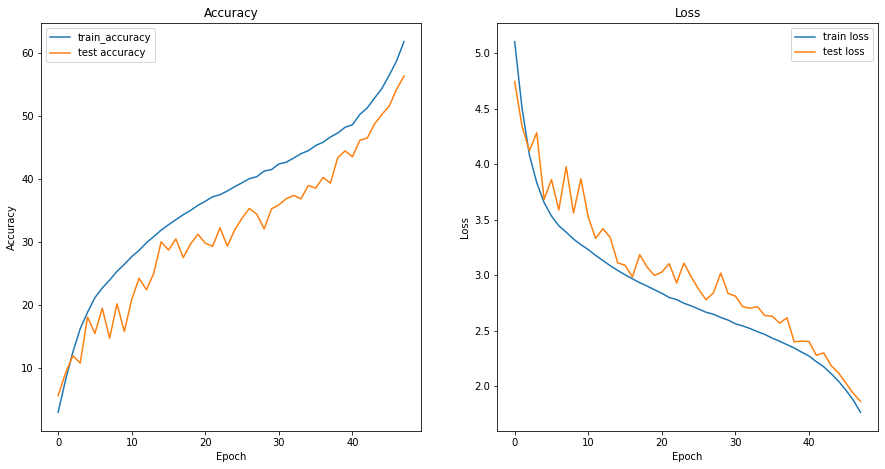

In [13]:
metrics.train_test_metrics_graph(train_accuracy, train_loss, test_accuracy, test_loss)

##To check Class activation mapping for misclassified images##

In [0]:
# Capture images, labels and predictions for misclassified samples
incorrect_labels, incorrect_predictions, incorrect_images = image_utilities.capture_correct_incorrect_classified_samples(net, device, testloader)

In [15]:
cam_dict = dict()

resnet_model_dict = dict(type='resnet', arch=net, layer_name='layer4', input_size=(64, 64))
resnet_gradcam = gradcam.GradCAM(resnet_model_dict, True)
#gradcam needs normalized image. Image from capture image function is normalized.
incorrect_images = incorrect_images.to(device)

saliency_map size : torch.Size([8, 8])


Display misclassified image's class activation

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


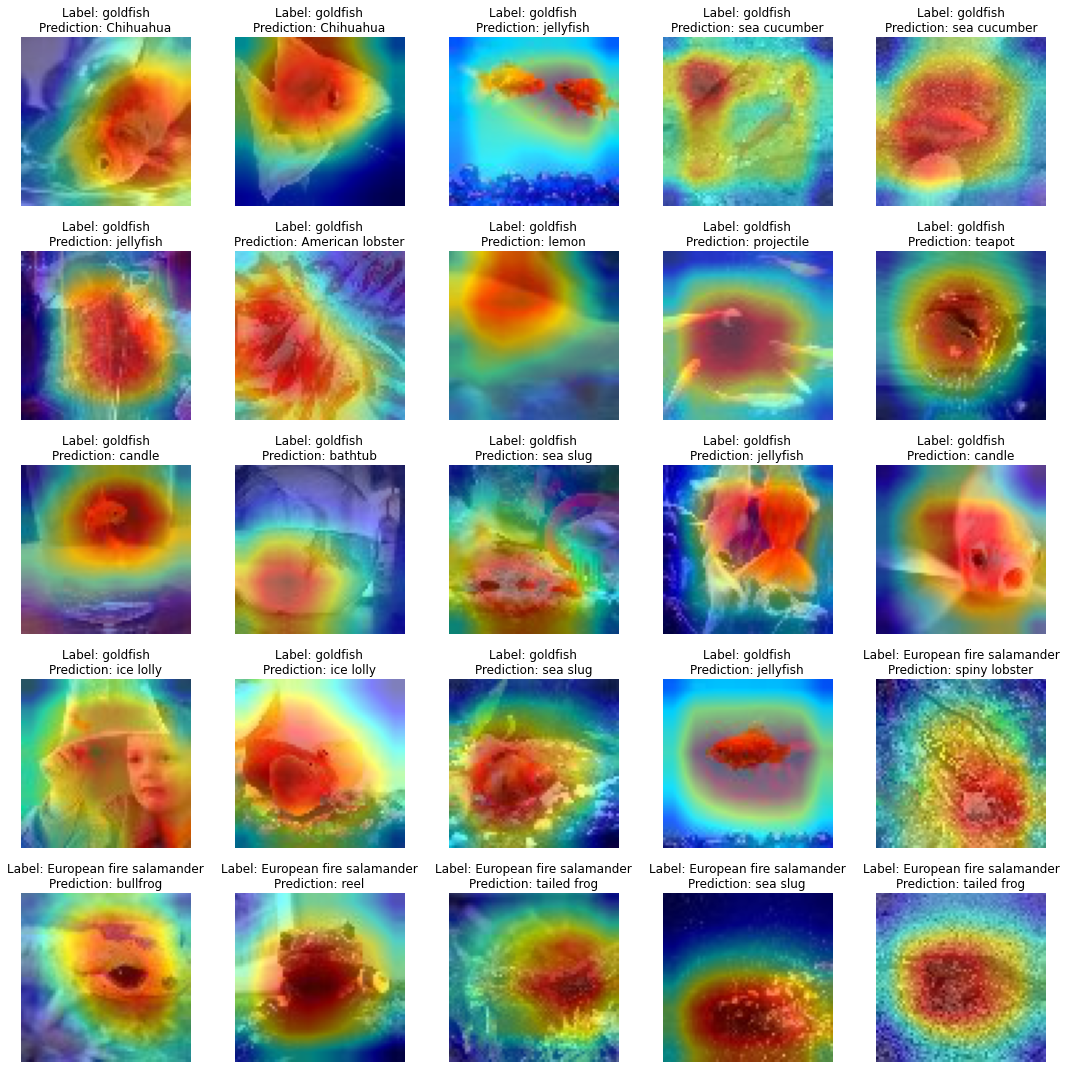

In [17]:
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.tight_layout()
i = 0
nrows = 5
ncols = 5
for row in range(nrows):
    for col in range(ncols):
        mask, _ = resnet_gradcam(incorrect_images[i].unsqueeze(dim=0))
        normal_image = utils.denormalize(incorrect_images[i].unsqueeze(dim=0),means,stddev)
        heatmap, result = utils.visualize_cam(mask.cpu(), normal_image)
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Label: {classes[incorrect_labels[i].item()][1]}\nPrediction: {classes[incorrect_predictions[i].item()][1]}')
        axs[row, col].imshow(np.transpose((result.numpy()), (1, 2, 0)))
        i += 1
fig.savefig("/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session12_ImageNet/run_results/grad_cam_missclassified.jpg", bbox_inches='tight')  


Display the raw image of the misclassified images.

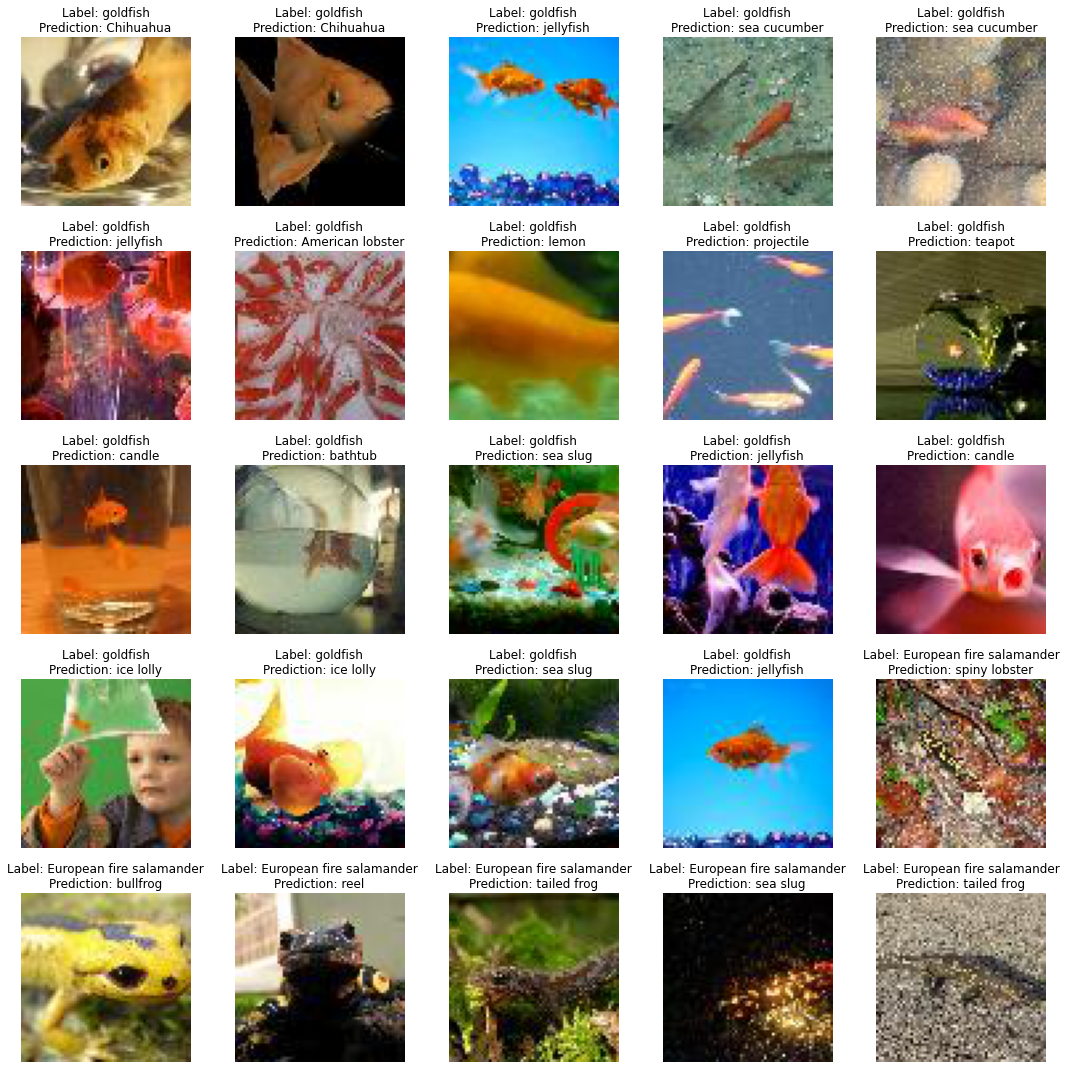

In [18]:
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.tight_layout()
i = 0
nrows = 5
ncols = 5
for row in range(nrows):
    for col in range(ncols):
        norm_image = utils.denormalize(incorrect_images[i].unsqueeze(dim=0),means,stddev)
        
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Label: {classes[incorrect_labels[i].item()][1]}\nPrediction: {classes[incorrect_predictions[i].item()][1]}')
        axs[row, col].imshow(np.transpose((norm_image.squeeze(dim=0).cpu().numpy()), (1, 2, 0)))
        i += 1